In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('seaborn-dark-palette')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = '8cb7be073fd1e4184536a9a415376c74'



C:\Users\mh223\AppData\Local\Temp\ipykernel_5252\3836901177.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


# Create The Fred Obj 🔄


In [12]:
fred = Fred(api_key=fred_key)

# Search For Economic Data 📊💵


In [13]:
sp_search = fred.search('S&P', order_by='popularity')
sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-02-23,2024-02-23,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-02-22,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-02-23 09:06:02-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-02-23,2024-02-23,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2023-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-01-30 08:11:02-06:00,87,"For more information regarding the index, plea..."
SP500,SP500,2024-02-23,2024-02-23,S&P 500,2014-02-24,2024-02-23,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-02-23 19:10:59-06:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-02-23,2024-02-23,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-02-23,2024-02-23,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-02-22,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-02-23 09:06:05-06:00,82,This data represents the effective yield of th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRNCUSJMA618NRUG,XRNCUSJMA618NRUG,2024-02-23,2024-02-23,Exchange Rate (market+estimated) for Jamaica,1953-01-01,2019-01-01,Annual,A,National Currency Units per US Dollar,National Currency Units per US $,Not Seasonally Adjusted,NSA,2021-01-21 13:31:47-06:00,3,Source ID: xr When using these data in your r...
HC01ESTVC1646007,HC01ESTVC1646007,2024-02-23,2024-02-23,High School Graduate or Higher (5-year estimat...,2010-01-01,2022-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2023-12-07 10:39:44-06:00,3,Estimate of educational attainment for populat...
DDDM02DKA156NWDB,DDDM02DKA156NWDB,2024-02-23,2024-02-23,Stock Market Total Value Traded to GDP for Den...,1975-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-23 16:32:17-05:00,3,Total value of all traded shares in a stock ma...


# Pull Raw Data & Plot 📈


In [14]:
sp500 =  fred.get_series(series_id='SP500')
sp500

2014-02-24    1847.61
2014-02-25    1845.12
2014-02-26    1845.16
2014-02-27    1854.29
2014-02-28    1859.45
               ...   
2024-02-19        NaN
2024-02-20    4975.51
2024-02-21    4981.80
2024-02-22    5087.03
2024-02-23    5088.80
Length: 2610, dtype: float64

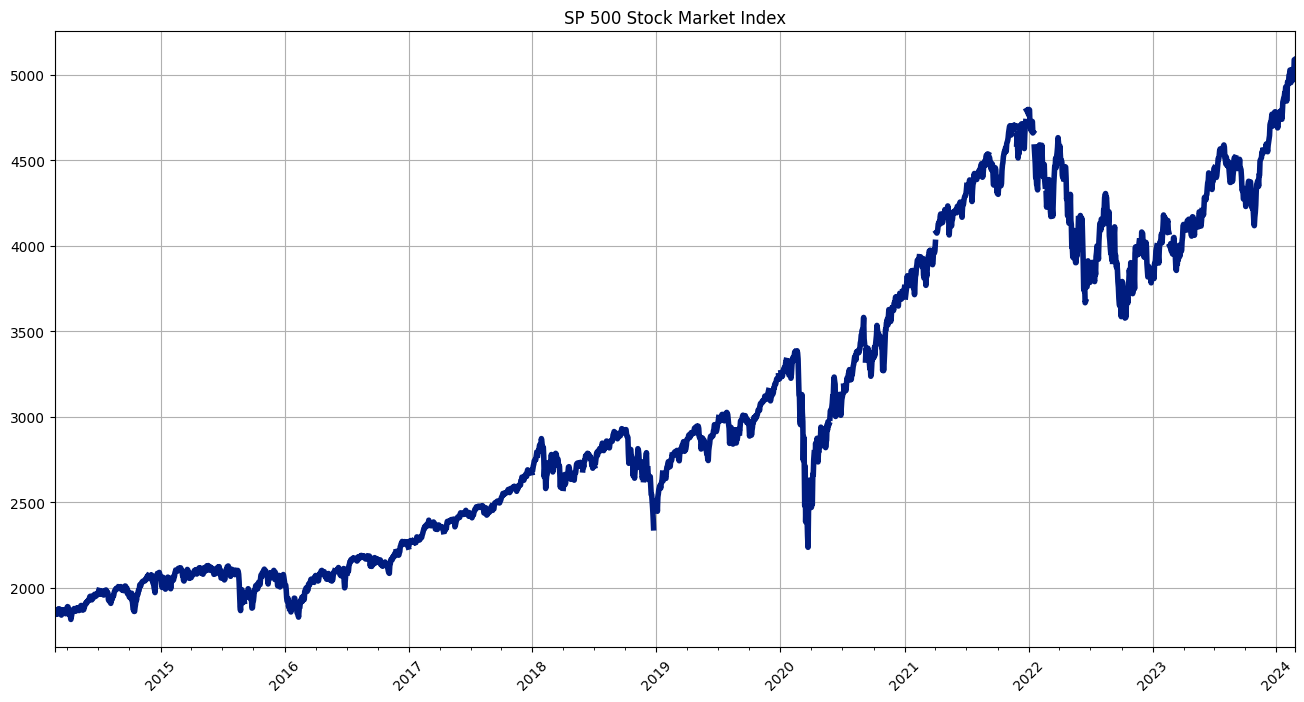

In [15]:
sp500.plot(figsize= (16,8) , title='SP 500 Stock Market Index',grid = True,lw=4)
plt.xticks(rotation=45)
plt.show()

# Pull And Join Multiple Data Series 📊


In [27]:
unemp_df= fred.search('unemployment state',filter=('frequency','Monthly')).query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df= unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [28]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-02-23,2024-02-23,Unemployment Rate,1948-01-01,2024-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-02-02 07:49:02-06:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-02-23,2024-02-23,Unemployment Rate - Black or African American,1972-01-01,2024-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-02-02 07:49:02-06:00,71,The series comes from the 'Current Population ...
CAUR,CAUR,2024-02-23,2024-02-23,Unemployment Rate in California,1976-01-01,2023-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-01-25 12:42:01-06:00,64,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2024-02-23,2024-02-23,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,53,Series Is Presented Here As Three Variables--(...
TXUR,TXUR,2024-02-23,2024-02-23,Unemployment Rate in Texas,1976-01-01,2023-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-01-25 12:41:02-06:00,57,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14024230,LNS14024230,2024-02-23,2024-02-23,Unemployment Rate - 55 Yrs. & over,1948-01-01,2024-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-02-02 07:49:29-06:00,7,The series comes from the 'Current Population ...
LNS14000089,LNS14000089,2024-02-23,2024-02-23,Unemployment Rate - 25-34 Yrs.,1948-01-01,2024-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-02-02 07:49:46-06:00,7,The series comes from the 'Current Population ...
LNS14000015,LNS14000015,2024-02-23,2024-02-23,"Unemployment Rate - 16-19 Yrs., White",1954-01-01,2024-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-02-02 07:49:59-06:00,7,The series comes from the 'Current Population ...


In [44]:
all_results = []
for myId in unemp_df.index :
    results = fred.get_series(myId) # this is the function from FRED that gets data from FRED
    results=results.to_frame(name =myId)
    all_results.append(results)


In [45]:
all_results[1]

,LNS14000006
1972-01-01,11.2
1972-02-01,11.2
1972-03-01,10.7
1972-04-01,9.8
1972-05-01,10.2
...,...
2023-09-01,5.7
2023-10-01,5.8
2023-11-01,5.8
2023-12-01,5.2
